In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


In [11]:
import pandas as pd
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv("./Course_Job_Recommendation_Dataset.csv")
df

,id,Degree Stream,SSC Percent,Hsc Percent,gender,EtestPErcent,Jobs.Key Skills,specialization,Jobs.Job Salary,Jobs.Job Experience Required,Jobs.Role Category,Jobs.Functional Area,Jobs.Industry,Jobs.Job Title
0,1,Science,91.13,89.81,Male,92,hiring| HRIS| procurement| HR| sourcing| Recr...,Electrical,"1,00,000 - 1,50,000 PA.",1 - 6 yrs,HR/ Recruitment / IR,"HR , Recruitment , Administration , IR","Recruitment, Staffing",Recruitment Executive
1,2,Commerce,95.91,91.81,Female,85,IT services| Relationship building| Business ...,Finance,NaN,3 - 8 yrs,Corporate Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales/Business Development Manager
2,3,Arts,95.27,95.96,Female,91,teaching| Counselor| Mentor| Trainer| Advisor,Special Education,NaN,2 - 4 yrs,Teachers,"Teaching , Education , Training , Counselling","Education, Teaching, Training",Lab Assistant
3,4,Arts,95.62,93.56,Non-binary,95,Service engineering| Petrochemical| Chemical|...,Sociology,NaN,5 - 8 yrs,Safety/Health/Environment,"Production , Manufacturing , Maintenance","Recruitment, Staffing",Environment Engineer/Officer
4,5,Commerce,91.36,88.67,Female,95,Loans| Direct Sales Associate| Policies| Bfsi...,Social work and helping Professions,NaN,1 - 4 yrs,Retail/Personal Banking,"Financial Services , Banking , Investments , I...","Recruitment, Staffing",Sales Officer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21268,995,Arts,53.46,57.45,Bigender,36,Java|Angular JS|Hibernate|Core Java|Technical ...,exercise science.,NaN,6 - 11 Years,Programming & Design,"IT Software - Application Programming , Mainte...",IT-Software / Software Services,Software Developer
21269,996,Arts,41.56,56.41,Male,39,Sou Chef|sous chef,Culinary Arts,"INR 6,00,000 - 9,00,000 PA.",10 - 15 Years,Food & Beverage,"Hotels , Restaurants",Travel / Hotels / Restaurants / Airlines / Rai...,Sous Chef
21270,997,Arts,54.46,50.48,Female,36,Printing| Graphic designing| Usage| Illustrat...,Graphic Design,NaN,1 - 6 yrs,Creative,"Design , Creative , User Experience","IT-Software, Software Services",Graphic Designer
21271,998,Science,41.49,54.85,Female,39,Inventory Control| Pharmacy| External Audit| ...,Conservation Biology,"1,00,000 - 2,00,000 PA.",1 - 3 yrs,R&D,"Medical , Healthcare , R&D , Pharmaceuticals ,...","Media, Entertainment, Internet",Pharmacist/Chemist/Bio Chemist


In [13]:
df['id'].value_counts()

571    25
754    25
44     25
563    25
485    25
       ..
46     16
691    15
642    14
871    14
487    12
Name: id, Length: 1000, dtype: int64

**Data Preprocessing**

In [14]:
df.shape

(21273, 14)

In [15]:
df.dtypes

id                                int64
Degree Stream                    object
SSC Percent                     float64
Hsc Percent                     float64
gender                           object
EtestPErcent                      int64
Jobs.Key Skills                  object
specialization                   object
Jobs.Job Salary                  object
Jobs.Job Experience Required     object
Jobs.Role Category               object
Jobs.Functional Area             object
Jobs.Industry                    object
Jobs.Job Title                   object
dtype: object

In [16]:
df.isna().sum()

id                                  0
Degree Stream                       0
SSC Percent                         0
Hsc Percent                         0
gender                              0
EtestPErcent                        0
Jobs.Key Skills                     0
specialization                      0
Jobs.Job Salary                 15447
Jobs.Job Experience Required        0
Jobs.Role Category                  0
Jobs.Functional Area                0
Jobs.Industry                       0
Jobs.Job Title                      0
dtype: int64

In [17]:
df1=df.copy()
df1.drop(['Jobs.Job Experience Required','Jobs.Functional Area','Jobs.Industry','id'],axis=1,inplace=True)
df1

,Degree Stream,SSC Percent,Hsc Percent,gender,EtestPErcent,Jobs.Key Skills,specialization,Jobs.Job Salary,Jobs.Role Category,Jobs.Job Title
0,Science,91.13,89.81,Male,92,hiring| HRIS| procurement| HR| sourcing| Recr...,Electrical,"1,00,000 - 1,50,000 PA.",HR/ Recruitment / IR,Recruitment Executive
1,Commerce,95.91,91.81,Female,85,IT services| Relationship building| Business ...,Finance,NaN,Corporate Sales,Sales/Business Development Manager
2,Arts,95.27,95.96,Female,91,teaching| Counselor| Mentor| Trainer| Advisor,Special Education,NaN,Teachers,Lab Assistant
3,Arts,95.62,93.56,Non-binary,95,Service engineering| Petrochemical| Chemical|...,Sociology,NaN,Safety/Health/Environment,Environment Engineer/Officer
4,Commerce,91.36,88.67,Female,95,Loans| Direct Sales Associate| Policies| Bfsi...,Social work and helping Professions,NaN,Retail/Personal Banking,Sales Officer
...,...,...,...,...,...,...,...,...,...,...
21268,Arts,53.46,57.45,Bigender,36,Java|Angular JS|Hibernate|Core Java|Technical ...,exercise science.,NaN,Programming & Design,Software Developer
21269,Arts,41.56,56.41,Male,39,Sou Chef|sous chef,Culinary Arts,"INR 6,00,000 - 9,00,000 PA.",Food & Beverage,Sous Chef
21270,Arts,54.46,50.48,Female,36,Printing| Graphic designing| Usage| Illustrat...,Graphic Design,NaN,Creative,Graphic Designer
21271,Science,41.49,54.85,Female,39,Inventory Control| Pharmacy| External Audit| ...,Conservation Biology,"1,00,000 - 2,00,000 PA.",R&D,Pharmacist/Chemist/Bio Chemist


In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['Degree Stream','SSC Percent','Hsc Percent','gender', 'EtestPErcent','specialization','Jobs.Job Salary','Jobs.Key Skills','Jobs.Role Category','Jobs.Job Title']
for i in lst:
  df1[i]=le.fit_transform(df1[i])

In [19]:
df1

,Degree Stream,SSC Percent,Hsc Percent,gender,EtestPErcent,Jobs.Key Skills,specialization,Jobs.Job Salary,Jobs.Role Category,Jobs.Job Title
0,3,3940,4046,5,60,38,19,0,13,30
1,1,4409,4233,2,53,12,25,17,7,33
2,0,4346,4597,2,59,50,52,17,29,17
3,0,4381,4387,6,63,29,50,17,26,11
4,2,3963,3941,2,63,15,49,17,25,32
...,...,...,...,...,...,...,...,...,...,...
21268,0,720,995,1,6,53,55,17,22,36
21269,0,62,894,5,9,55,13,16,12,37
21270,0,804,320,2,6,24,27,17,8,15
21271,3,60,748,2,9,13,12,1,23,26


In [20]:
df1.dtypes

Degree Stream         int32
SSC Percent           int64
Hsc Percent           int64
gender                int32
EtestPErcent          int64
Jobs.Key Skills       int32
specialization        int32
Jobs.Job Salary       int32
Jobs.Role Category    int32
Jobs.Job Title        int32
dtype: object

In [21]:
#Filling the missing values in the column salary
df1['Jobs.Job Salary']=df1['Jobs.Job Salary'].fillna(df1['Jobs.Job Salary'].mode()[0])

In [22]:
X=df1.iloc[:,:7]
y=df1.iloc[:,7:10]
print(y)

       Jobs.Job Salary  Jobs.Role Category  Jobs.Job Title
0                    0                  13              30
1                   17                   7              33
2                   17                  29              17
3                   17                  26              11
4                   17                  25              32
...                ...                 ...             ...
21268               17                  22              36
21269               16                  12              37
21270               17                   8              15
21271                1                  23              26
21272               17                  22              36

[21273 rows x 3 columns]


In [23]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Generate synthetic multi-output data
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=3, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using RandomForestClassifier as the base estimator
multi_output_clf = MultiOutputClassifier(RandomForestClassifier())

# Fit the model on the training data
multi_output_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.86      0.92      0.89        13
           2       0.92      1.00      0.96        12

   micro avg       0.89      0.89      0.89        36
   macro avg       0.89      0.88      0.88        36
weighted avg       0.89      0.89      0.89        36
 samples avg       0.86      0.81      0.82        36



**K Neighbors classifier**

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.75      0.92      0.83        13
           2       0.71      0.83      0.77        12

   micro avg       0.77      0.83      0.80        36
   macro avg       0.78      0.83      0.80        36
weighted avg       0.78      0.83      0.80        36
 samples avg       0.74      0.76      0.73        36



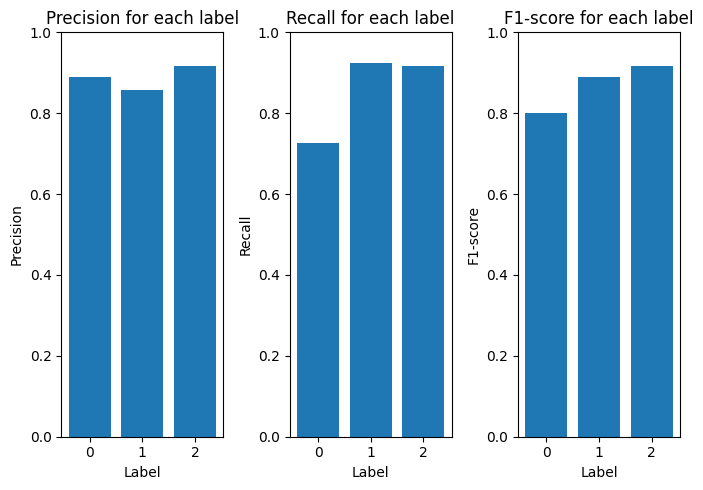

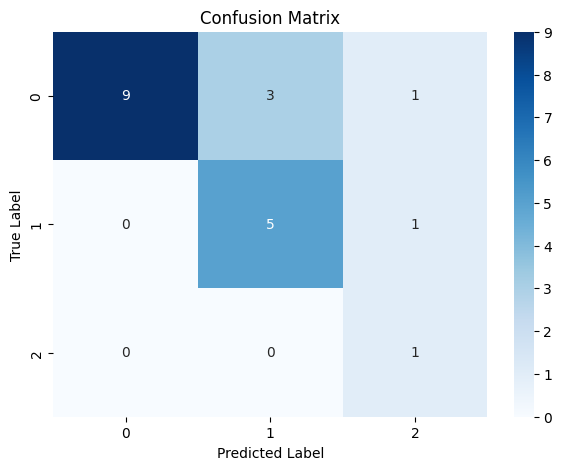

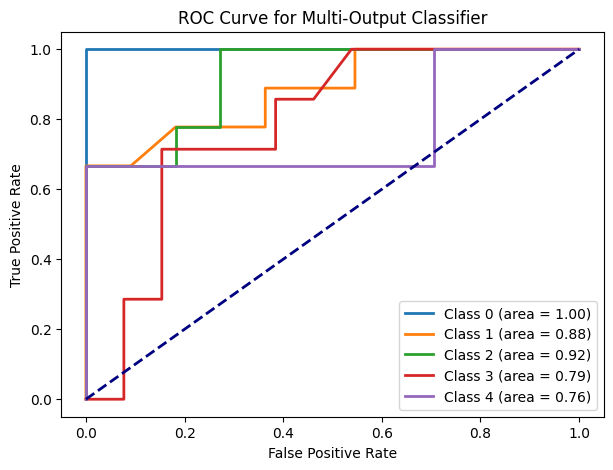

In [24]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import numpy as np

# Generate synthetic multi-output data
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=3, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using RandomForestClassifier as the base estimator
multi_output_clf = MultiOutputClassifier(RandomForestClassifier())

# Fit the model on the training data
multi_output_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_clf.predict(X_test)

# Evaluate the model and get the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Bar plot for precision, recall, and F1-score for each label
labels = [str(label) for label in range(y.shape[1])]
metrics = ["precision", "recall", "f1-score"]

plt.figure(figsize=(7, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    plt.bar(labels, [report[label][metric] for label in labels])
    plt.ylim(0, 1)
    plt.xlabel('Label')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} for each label')
plt.tight_layout()
plt.show()



# Confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Generate synthetic multi-output data with more unique labels (n_classes=5)
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=5, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using RandomForestClassifier as the base estimator
multi_output_clf = MultiOutputClassifier(RandomForestClassifier())

# Fit the model on the training data
multi_output_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_clf.predict(X_test)

# Get predicted probabilities
y_pred_prob = multi_output_clf.predict_proba(X_test)

# Plot the ROC curve for each class
plt.figure(figsize=(7, 5))
for i in range(len(y_test[0])):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_prob[i][:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (area = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Output Classifier')
plt.legend(loc='lower right')
plt.show()


**Support Vector Classifier**

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.86      0.92      0.89        13
           2       1.00      0.92      0.96        12

   micro avg       0.91      0.89      0.90        36
   macro avg       0.92      0.89      0.90        36
weighted avg       0.92      0.89      0.90        36
 samples avg       0.88      0.80      0.82        36



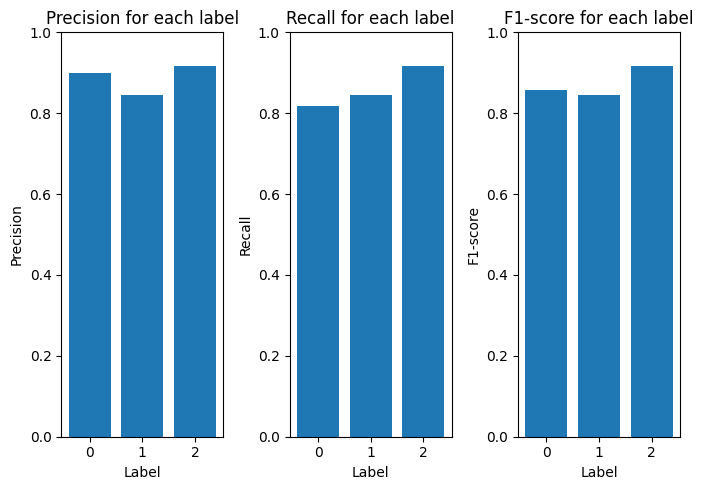

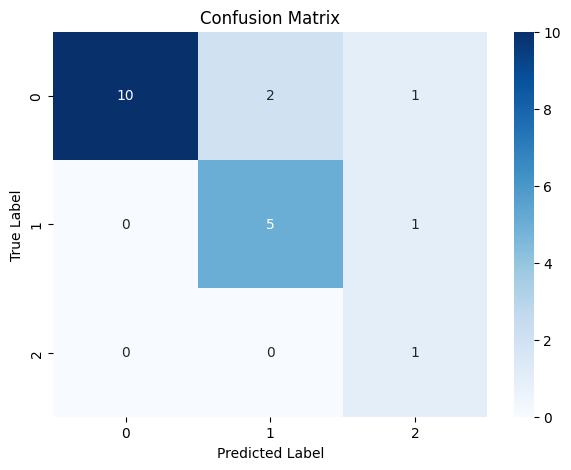

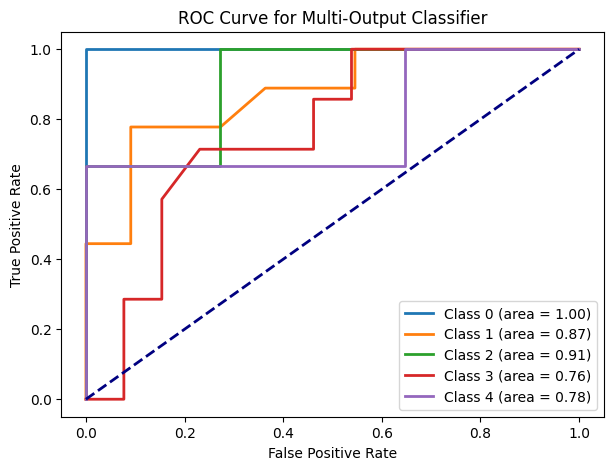

In [25]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Generate synthetic multi-output data
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=3, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using SVC as the base estimator
multi_output_svc = MultiOutputClassifier(SVC())

# Fit the model on the training data
multi_output_svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_svc.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import numpy as np

# Generate synthetic multi-output data
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=3, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using RandomForestClassifier as the base estimator
multi_output_clf = MultiOutputClassifier(RandomForestClassifier())

# Fit the model on the training data
multi_output_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_clf.predict(X_test)

# Evaluate the model and get the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Bar plot for precision, recall, and F1-score for each label
labels = [str(label) for label in range(y.shape[1])]
metrics = ["precision", "recall", "f1-score"]

plt.figure(figsize=(7, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    plt.bar(labels, [report[label][metric] for label in labels])
    plt.ylim(0, 1)
    plt.xlabel('Label')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} for each label')
plt.tight_layout()
plt.show()



# Confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Generate synthetic multi-output data with more unique labels (n_classes=5)
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=5, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using RandomForestClassifier as the base estimator
multi_output_clf = MultiOutputClassifier(RandomForestClassifier())

# Fit the model on the training data
multi_output_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_clf.predict(X_test)

# Get predicted probabilities
y_pred_prob = multi_output_clf.predict_proba(X_test)

# Plot the ROC curve for each class
plt.figure(figsize=(7, 5))
for i in range(len(y_test[0])):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_prob[i][:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (area = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Output Classifier')
plt.legend(loc='lower right')
plt.show()


**Naive Bayes**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.67      0.67      0.67         9
           2       0.62      0.89      0.73         9
           3       0.50      0.71      0.59         7
           4       0.67      0.67      0.67         3

   micro avg       0.64      0.78      0.70        32
   macro avg       0.69      0.79      0.73        32
weighted avg       0.66      0.78      0.71        32
 samples avg       0.64      0.79      0.66        32



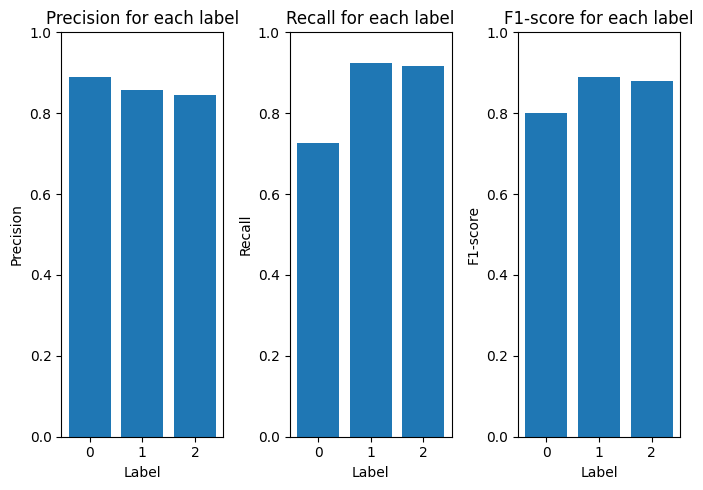

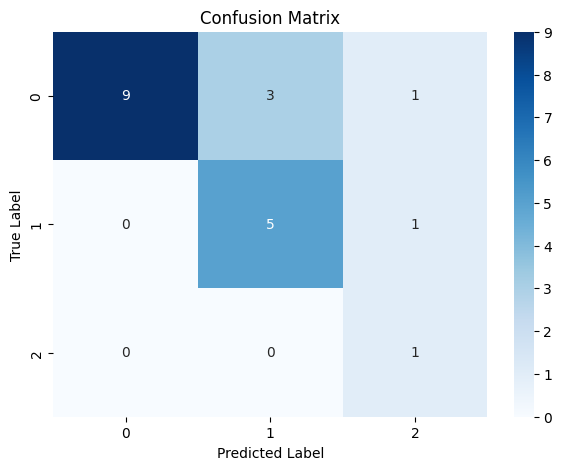

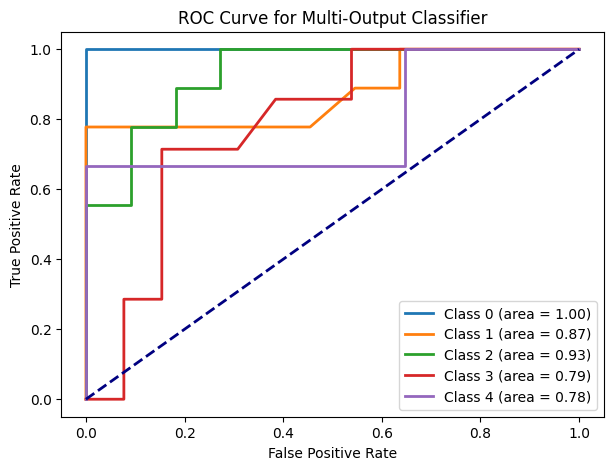

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multioutput import MultiOutputClassifier

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Create the GaussianNB classifier
nb = GaussianNB()

# Create the MultiOutputClassifier using GaussianNB as the base estimator
multi_output_nb = MultiOutputClassifier(nb)

# Fit the MultiOutputClassifier on the training data
multi_output_nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_nb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import numpy as np

# Generate synthetic multi-output data
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=3, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using RandomForestClassifier as the base estimator
multi_output_clf = MultiOutputClassifier(RandomForestClassifier())

# Fit the model on the training data
multi_output_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_clf.predict(X_test)

# Evaluate the model and get the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Bar plot for precision, recall, and F1-score for each label
labels = [str(label) for label in range(y.shape[1])]
metrics = ["precision", "recall", "f1-score"]

plt.figure(figsize=(7, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    plt.bar(labels, [report[label][metric] for label in labels])
    plt.ylim(0, 1)
    plt.xlabel('Label')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} for each label')
plt.tight_layout()
plt.show()



# Confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Generate synthetic multi-output data with more unique labels (n_classes=5)
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=5, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using RandomForestClassifier as the base estimator
multi_output_clf = MultiOutputClassifier(RandomForestClassifier())

# Fit the model on the training data
multi_output_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_clf.predict(X_test)

# Get predicted probabilities
y_pred_prob = multi_output_clf.predict_proba(X_test)

# Plot the ROC curve for each class
plt.figure(figsize=(7, 5))
for i in range(len(y_test[0])):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_prob[i][:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (area = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Output Classifier')
plt.legend(loc='lower right')
plt.show()


**Decision Tree**

              precision    recall  f1-score   support

           0       0.43      0.75      0.55         4
           1       0.71      0.56      0.63         9
           2       0.62      0.56      0.59         9
           3       0.44      0.57      0.50         7
           4       0.33      0.67      0.44         3

   micro avg       0.51      0.59      0.55        32
   macro avg       0.51      0.62      0.54        32
weighted avg       0.56      0.59      0.56        32
 samples avg       0.62      0.73      0.60        32



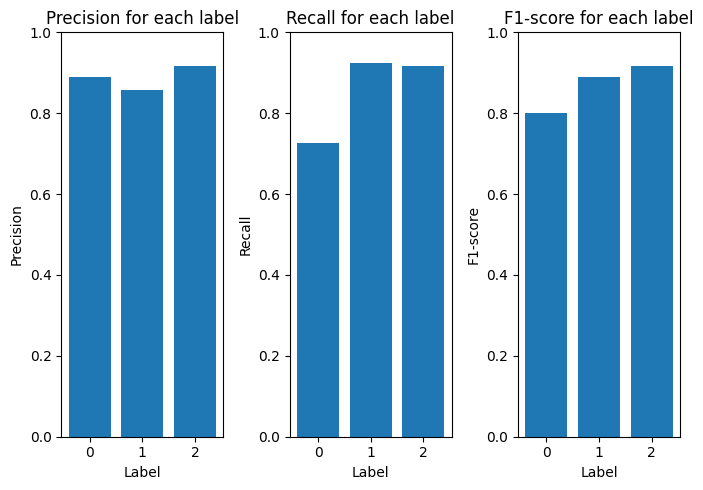

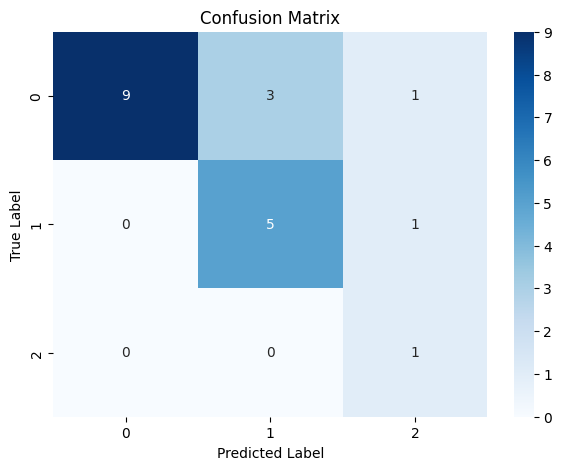

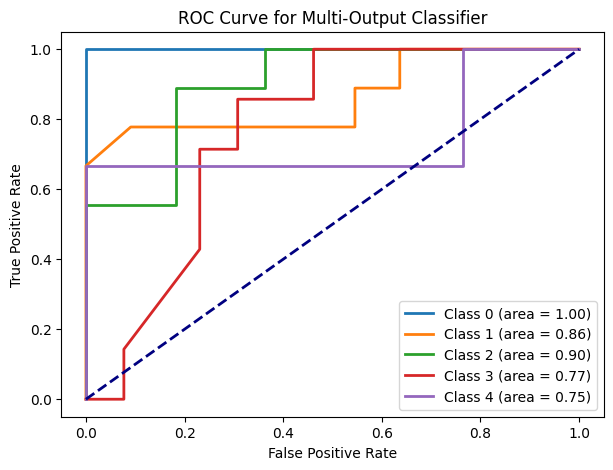

In [27]:
dt=DecisionTreeClassifier(criterion='gini',random_state=1)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
print(classification_report(y_test,y_pred3))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import numpy as np

# Generate synthetic multi-output data
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=3, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using RandomForestClassifier as the base estimator
multi_output_clf = MultiOutputClassifier(RandomForestClassifier())

# Fit the model on the training data
multi_output_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_clf.predict(X_test)

# Evaluate the model and get the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Bar plot for precision, recall, and F1-score for each label
labels = [str(label) for label in range(y.shape[1])]
metrics = ["precision", "recall", "f1-score"]

plt.figure(figsize=(7, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    plt.bar(labels, [report[label][metric] for label in labels])
    plt.ylim(0, 1)
    plt.xlabel('Label')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} for each label')
plt.tight_layout()
plt.show()



# Confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Generate synthetic multi-output data with more unique labels (n_classes=5)
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=5, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using RandomForestClassifier as the base estimator
multi_output_clf = MultiOutputClassifier(RandomForestClassifier())

# Fit the model on the training data
multi_output_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_clf.predict(X_test)

# Get predicted probabilities
y_pred_prob = multi_output_clf.predict_proba(X_test)

# Plot the ROC curve for each class
plt.figure(figsize=(7, 5))
for i in range(len(y_test[0])):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_prob[i][:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (area = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Output Classifier')
plt.legend(loc='lower right')
plt.show()


**Random Forest**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.78      0.88         9
           2       0.82      1.00      0.90         9
           3       0.56      0.71      0.63         7
           4       1.00      0.67      0.80         3

   micro avg       0.82      0.84      0.83        32
   macro avg       0.87      0.83      0.84        32
weighted avg       0.85      0.84      0.84        32
 samples avg       0.85      0.88      0.84        32



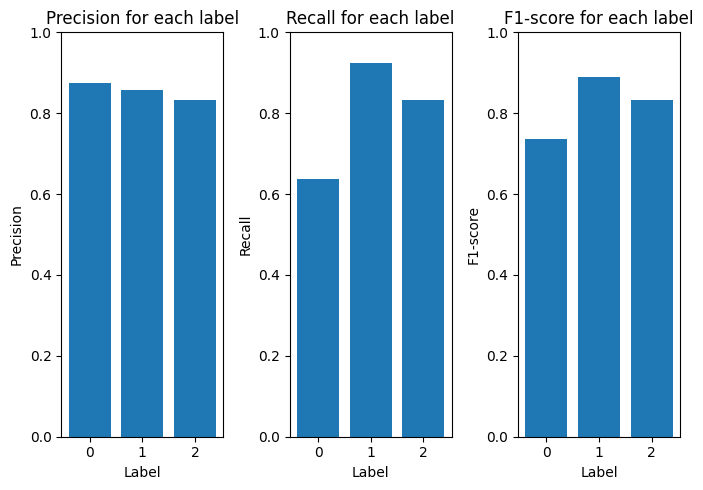

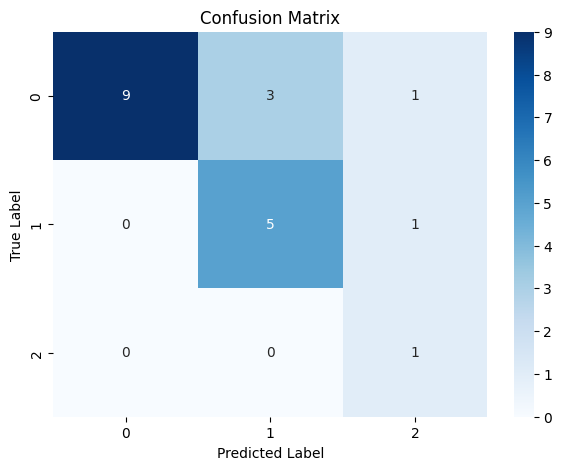

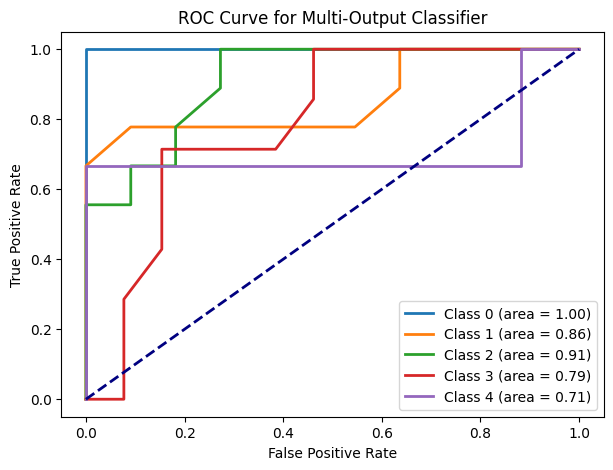

In [28]:
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
print(classification_report(y_test,y_pred4))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import numpy as np

# Generate synthetic multi-output data
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=3, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using RandomForestClassifier as the base estimator
multi_output_clf = MultiOutputClassifier(RandomForestClassifier())

# Fit the model on the training data
multi_output_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_clf.predict(X_test)

# Evaluate the model and get the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Bar plot for precision, recall, and F1-score for each label
labels = [str(label) for label in range(y.shape[1])]
metrics = ["precision", "recall", "f1-score"]

plt.figure(figsize=(7, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    plt.bar(labels, [report[label][metric] for label in labels])
    plt.ylim(0, 1)
    plt.xlabel('Label')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} for each label')
plt.tight_layout()
plt.show()



# Confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Generate synthetic multi-output data with more unique labels (n_classes=5)
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=5, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using RandomForestClassifier as the base estimator
multi_output_clf = MultiOutputClassifier(RandomForestClassifier())

# Fit the model on the training data
multi_output_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_clf.predict(X_test)

# Get predicted probabilities
y_pred_prob = multi_output_clf.predict_proba(X_test)

# Plot the ROC curve for each class
plt.figure(figsize=(7, 5))
for i in range(len(y_test[0])):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_prob[i][:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (area = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Output Classifier')
plt.legend(loc='lower right')
plt.show()


**AdaBoost**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.73      0.89      0.80         9
           2       0.83      0.56      0.67         9
           3       0.56      0.71      0.63         7
           4       0.33      0.67      0.44         3

   micro avg       0.67      0.75      0.71        32
   macro avg       0.69      0.77      0.71        32
weighted avg       0.72      0.75      0.72        32
 samples avg       0.57      0.69      0.59        32



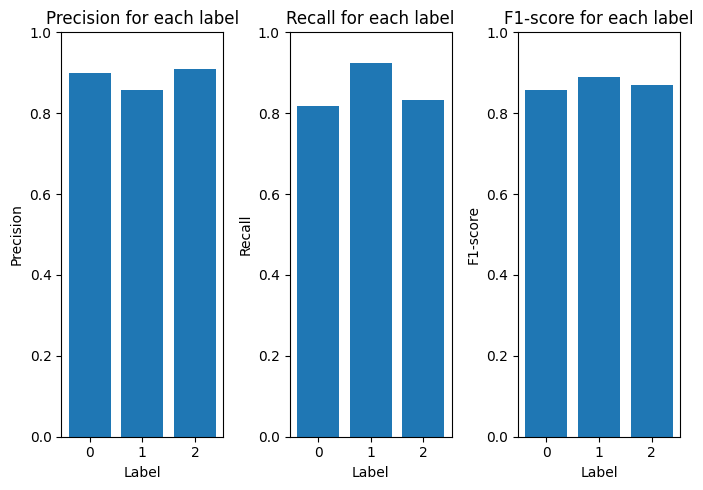

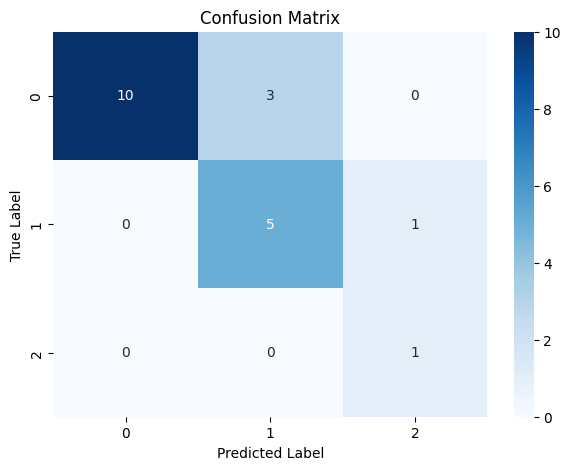

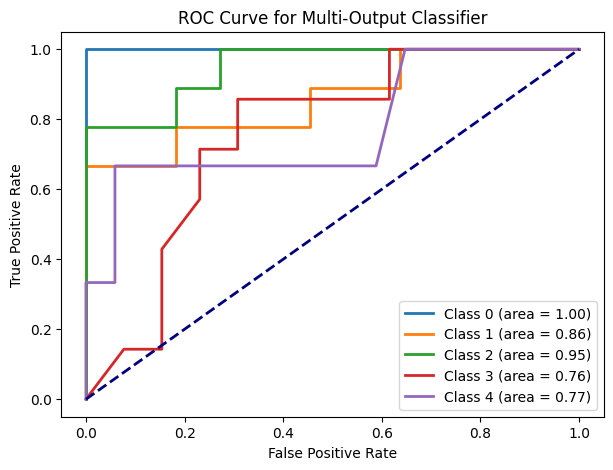

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multioutput import MultiOutputClassifier

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Create the AdaBoostClassifier
ad = AdaBoostClassifier()

# Create the MultiOutputClassifier using AdaBoostClassifier as the base estimator
multi_output_ad = MultiOutputClassifier(ad)

# Fit the MultiOutputClassifier on the training data
multi_output_ad.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_ad.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import numpy as np

# Generate synthetic multi-output data
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=3, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using RandomForestClassifier as the base estimator
multi_output_clf = MultiOutputClassifier(RandomForestClassifier())

# Fit the model on the training data
multi_output_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_clf.predict(X_test)

# Evaluate the model and get the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Bar plot for precision, recall, and F1-score for each label
labels = [str(label) for label in range(y.shape[1])]
metrics = ["precision", "recall", "f1-score"]

plt.figure(figsize=(7, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    plt.bar(labels, [report[label][metric] for label in labels])
    plt.ylim(0, 1)
    plt.xlabel('Label')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} for each label')
plt.tight_layout()
plt.show()



# Confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Generate synthetic multi-output data with more unique labels (n_classes=5)
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=5, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using RandomForestClassifier as the base estimator
multi_output_clf = MultiOutputClassifier(RandomForestClassifier())

# Fit the model on the training data
multi_output_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_clf.predict(X_test)

# Get predicted probabilities
y_pred_prob = multi_output_clf.predict_proba(X_test)

# Plot the ROC curve for each class
plt.figure(figsize=(7, 5))
for i in range(len(y_test[0])):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_prob[i][:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (area = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Output Classifier')
plt.legend(loc='lower right')
plt.show()


**Gradient Boosting**

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.88      0.78      0.82         9
           2       0.73      0.89      0.80         9
           3       0.57      0.57      0.57         7
           4       0.25      0.33      0.29         3

   micro avg       0.69      0.75      0.72        32
   macro avg       0.64      0.71      0.67        32
weighted avg       0.70      0.75      0.72        32
 samples avg       0.67      0.81      0.70        32



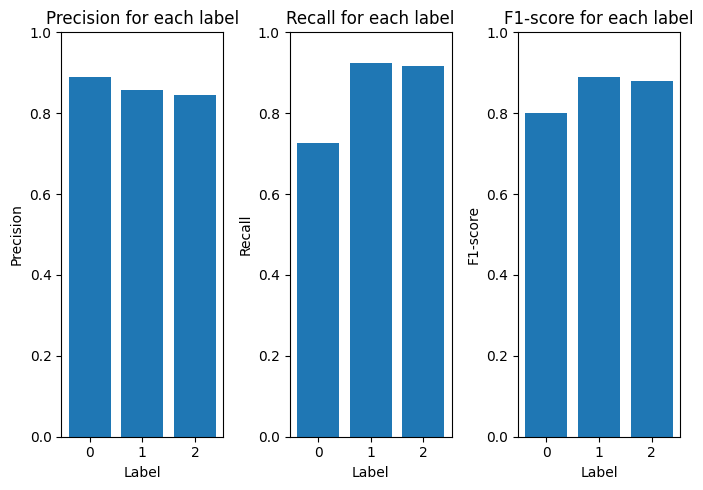

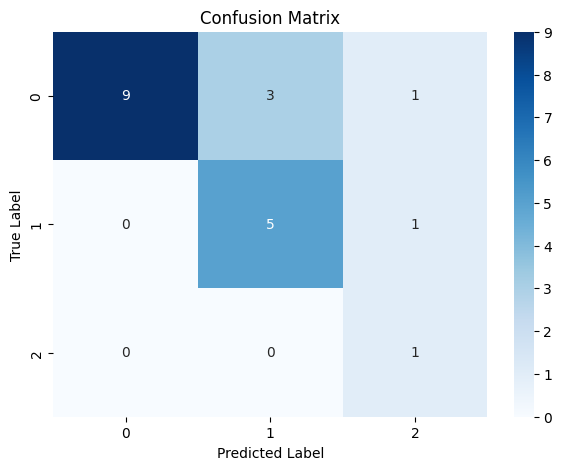

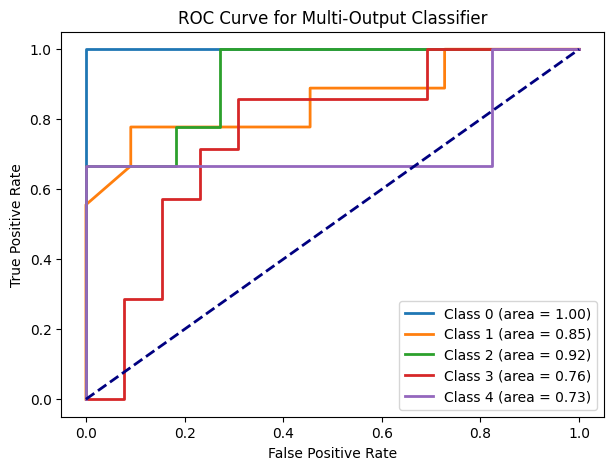

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

# Create the base estimator (GradientBoostingClassifier)
base_estimator = GradientBoostingClassifier()

# Wrap the base estimator with MultiOutputClassifier
multi_output_gb = MultiOutputClassifier(base_estimator)

# Fit the MultiOutputClassifier on the training data
multi_output_gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred6 = multi_output_gb.predict(X_test)

# Evaluate the model and print the classification report
print(classification_report(y_test, y_pred6))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import numpy as np

# Generate synthetic multi-output data
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=3, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using RandomForestClassifier as the base estimator
multi_output_clf = MultiOutputClassifier(RandomForestClassifier())

# Fit the model on the training data
multi_output_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_clf.predict(X_test)

# Evaluate the model and get the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Bar plot for precision, recall, and F1-score for each label
labels = [str(label) for label in range(y.shape[1])]
metrics = ["precision", "recall", "f1-score"]

plt.figure(figsize=(7, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    plt.bar(labels, [report[label][metric] for label in labels])
    plt.ylim(0, 1)
    plt.xlabel('Label')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} for each label')
plt.tight_layout()
plt.show()



# Confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Generate synthetic multi-output data with more unique labels (n_classes=5)
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=5, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using RandomForestClassifier as the base estimator
multi_output_clf = MultiOutputClassifier(RandomForestClassifier())

# Fit the model on the training data
multi_output_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_clf.predict(X_test)

# Get predicted probabilities
y_pred_prob = multi_output_clf.predict_proba(X_test)

# Plot the ROC curve for each class
plt.figure(figsize=(7, 5))
for i in range(len(y_test[0])):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_prob[i][:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (area = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Output Classifier')
plt.legend(loc='lower right')
plt.show()


**XG boosting**

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.71      0.56      0.63         9
           2       0.69      1.00      0.82         9
           3       0.56      0.71      0.63         7
           4       0.33      0.67      0.44         3

   micro avg       0.61      0.78      0.68        32
   macro avg       0.59      0.79      0.66        32
weighted avg       0.63      0.78      0.68        32
 samples avg       0.65      0.85      0.69        32



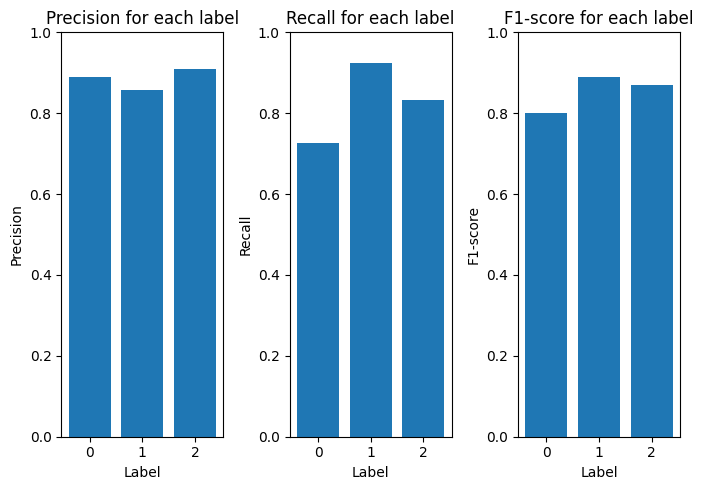

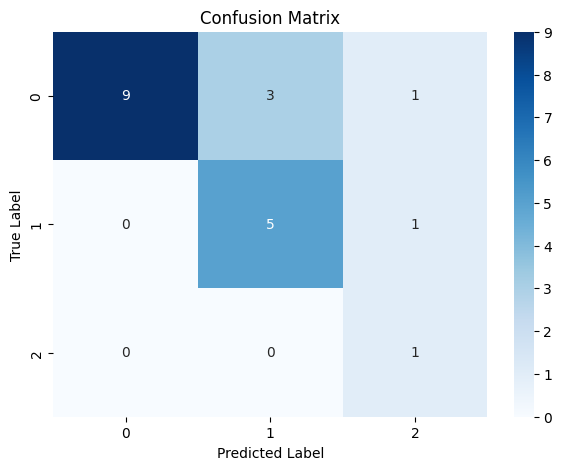

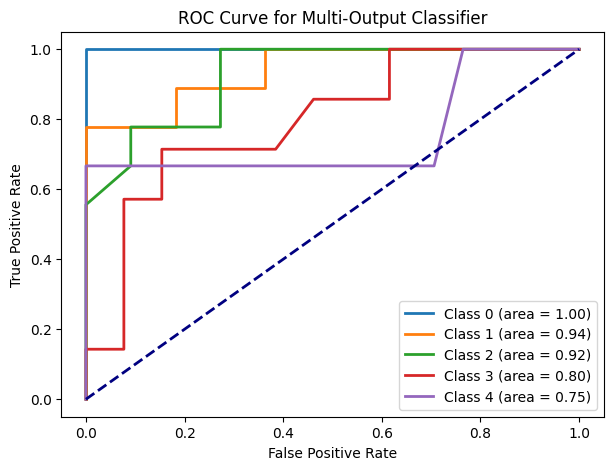

In [31]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred7=xgb.predict(X_test)
print(classification_report(y_test,y_pred7))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import numpy as np

# Generate synthetic multi-output data
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=3, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using RandomForestClassifier as the base estimator
multi_output_clf = MultiOutputClassifier(RandomForestClassifier())

# Fit the model on the training data
multi_output_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_clf.predict(X_test)

# Evaluate the model and get the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Bar plot for precision, recall, and F1-score for each label
labels = [str(label) for label in range(y.shape[1])]
metrics = ["precision", "recall", "f1-score"]

plt.figure(figsize=(7, 5))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    plt.bar(labels, [report[label][metric] for label in labels])
    plt.ylim(0, 1)
    plt.xlabel('Label')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} for each label')
plt.tight_layout()
plt.show()



# Confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


import matplotlib.pyplot as plt
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Generate synthetic multi-output data with more unique labels (n_classes=5)
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=5, n_labels=2, random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-output classifier using RandomForestClassifier as the base estimator
multi_output_clf = MultiOutputClassifier(RandomForestClassifier())

# Fit the model on the training data
multi_output_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_output_clf.predict(X_test)

# Get predicted probabilities
y_pred_prob = multi_output_clf.predict_proba(X_test)

# Plot the ROC curve for each class
plt.figure(figsize=(7, 5))
for i in range(len(y_test[0])):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_prob[i][:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (area = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Output Classifier')
plt.legend(loc='lower right')
plt.show()
